# Title : Anjana- Titanic Survival Classification
### Name : Anjana Dhakal, 
### Date: 11/04/2025

## Introduction: This project uses the Titanic dataset to predict passenger survival. Three classifiers—Decision Tree, Support Vector Machine (SVC), and Neural Network (NN)—will be trained and evaluated across three feature sets to compare their performance.

## Section 1. Import and Inspect the Data

In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
# Load Titanic dataset
titanic = sns.load_dataset("titanic")

# Display the first 10 rows.
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [3]:
# Check for missing values using the isnull() method and then the sum() method
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [4]:
# Display summary statistics using the describe() method
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 2. Data Exploration and Preparation
2.1 Handle Missing Values and Clean Data

In [5]:
# Fill missing age with median
titanic["age"] = titanic["age"].fillna(titanic["age"].median())

# Fill missing embark_town with mode
titanic["embark_town"] = titanic["embark_town"].fillna(titanic["embark_town"].mode()[0])

##
2.2 Feature Engineering

In [6]:
# Family size
titanic["family_size"] = titanic["sibsp"] + titanic["parch"] + 1

# Map categorical variables to numeric
titanic["sex"] = titanic["sex"].map({"male": 0, "female": 1})
titanic["embarked"] = titanic["embarked"].map({"C": 0, "Q": 1, "S": 2})
titanic["alone"] = titanic["alone"].astype(int)

## Section 3. Feature Selection and Justification
3.1 Selected Features

- Case 1: alone
- Case 2: age
- Case 3: age + family_size
- Target: survived

## 
3.2 Define X and y

In [7]:
# Case 1
X1 = titanic[["alone"]]
y1 = titanic["survived"]

# Case 2
X2 = titanic[["age"]].dropna()
y2 = titanic.loc[X2.index, "survived"]

# Case 3
X3 = titanic[["age", "family_size"]].dropna()
y3 = titanic.loc[X3.index, "survived"]

##
Reflection 3:
1. Why are these features selected?
- Case 1 (Feature: alone):The “alone” feature captures whether a passenger was traveling without family. This is likely predictive because passengers traveling alone historically had different survival rates compared to those with family.
- Case 2 (Feature: age): The “age” feature captures the passenger’s age, which is important because children and adults had different survival probabilities. Age is a key demographic factor affecting survival.
- Case 3 (Features: age + family_size): Combining “age” and “family_size” captures both individual and family characteristics. These features together are likely to provide stronger predictive power, as survival depended on both the passenger’s age and whether they were with family.

2. Are there features that are likely to be highly predictive of survival?
Yes. Combining age and family_size is likely highly predictive, since survival depended on both a passenger’s age and whether they were traveling with family.

## Section 4. Train a Classification Model (Decision Tree)
4.1 Split the Data

In [8]:
# Case 1: Feature = alone
splitter1 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_idx1, test_idx1 in splitter1.split(X1, y1):
    X1_train, X1_test = X1.iloc[train_idx1], X1.iloc[test_idx1]
    y1_train, y1_test = y1.iloc[train_idx1], y1.iloc[test_idx1]

print("Case 1 (Alone):")
print("Train size:", len(X1_train), "| Test size:", len(X1_test))

# Case 2: Feature = age
splitter2 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_idx2, test_idx2 in splitter2.split(X2, y2):
    X2_train, X2_test = X2.iloc[train_idx2], X2.iloc[test_idx2]
    y2_train, y2_test = y2.iloc[train_idx2], y2.iloc[test_idx2]

print("\nCase 2 (Age):")
print("Train size:", len(X2_train), "| Test size:", len(X2_test))

# Case 3: Features = age + family_size
splitter3 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_idx3, test_idx3 in splitter3.split(X3, y3):
    X3_train, X3_test = X3.iloc[train_idx3], X3.iloc[test_idx3]
    y3_train, y3_test = y3.iloc[train_idx3], y3.iloc[test_idx3]

print("\nCase 3 (Age + Family Size):")
print("Train size:", len(X3_train), "| Test size:", len(X3_test))

Case 1 (Alone):
Train size: 712 | Test size: 179

Case 2 (Age):
Train size: 712 | Test size: 179

Case 3 (Age + Family Size):
Train size: 712 | Test size: 179


##
4.2 Create and Train Model (Decision Tree)

In [9]:
# CASE 1: Decision Tree using alone
tree_model1 = DecisionTreeClassifier()
tree_model1.fit(X1_train, y1_train)

# CASE 2: Decision Tree using age
tree_model2 = DecisionTreeClassifier()
tree_model2.fit(X2_train, y2_train)

# CASE 3: Decision Tree using age and family_size
tree_model3 = DecisionTreeClassifier()
tree_model3.fit(X3_train, y3_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


## 
4.3 Evaluate Performance

In [10]:
# Predict on training data
y1_pred = tree_model1.predict(X1_train)
print("Case 1(alone) \nTraining Data: Results for Decision Tree")
print(classification_report(y1_train, y1_pred))

# Predict on test data
y1_test_pred = tree_model1.predict(X1_test)
print("Case 1(alone) \nTest Data: Results for Decision Tree")
print(classification_report(y1_test, y1_test_pred))

Case 1(alone) 
Training Data: Results for Decision Tree
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       439
           1       0.50      0.51      0.51       273

    accuracy                           0.62       712
   macro avg       0.60      0.60      0.60       712
weighted avg       0.62      0.62      0.62       712

Case 1(alone) 
Test Data: Results for Decision Tree
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



In [11]:
# Predict on training data
y2_pred = tree_model2.predict(X2_train)
print("Case 2(age) \nTraining Data: Results for Decision Tree")
print(classification_report(y2_train, y2_pred))

# Predict on test data
y2_test_pred = tree_model2.predict(X2_test)
print("Case 2(age) \nTest Data: Results for Decision Tree")
print(classification_report(y2_test, y2_test_pred))

Case 2(age) 
Training Data: Results for Decision Tree
              precision    recall  f1-score   support

           0       0.68      0.92      0.78       439
           1       0.69      0.29      0.41       273

    accuracy                           0.68       712
   macro avg       0.68      0.61      0.60       712
weighted avg       0.68      0.68      0.64       712

Case 2(age) 
Test Data: Results for Decision Tree
              precision    recall  f1-score   support

           0       0.63      0.89      0.74       110
           1       0.50      0.17      0.26        69

    accuracy                           0.61       179
   macro avg       0.57      0.53      0.50       179
weighted avg       0.58      0.61      0.55       179



In [12]:
# Predict on training data
y3_pred = tree_model3.predict(X3_train)
print("Case 3(age + family_size) \nTraining Data: Results for Decision Tree ")
print(classification_report(y3_train, y3_pred))

# Predict on test data
y3_test_pred = tree_model3.predict(X3_test)
print("Case 3(age + family_size) \nTest Data: Results for Decision Tree")
print(classification_report(y3_test, y3_test_pred))

Case 3(age + family_size) 
Training Data: Results for Decision Tree 
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       439
           1       0.77      0.56      0.65       273

    accuracy                           0.77       712
   macro avg       0.77      0.73      0.74       712
weighted avg       0.77      0.77      0.76       712

Case 3(age + family_size) 
Test Data: Results for Decision Tree
              precision    recall  f1-score   support

           0       0.65      0.75      0.69       110
           1       0.46      0.35      0.40        69

    accuracy                           0.59       179
   macro avg       0.55      0.55      0.54       179
weighted avg       0.57      0.59      0.58       179



##
4.4 Confusion Matrices

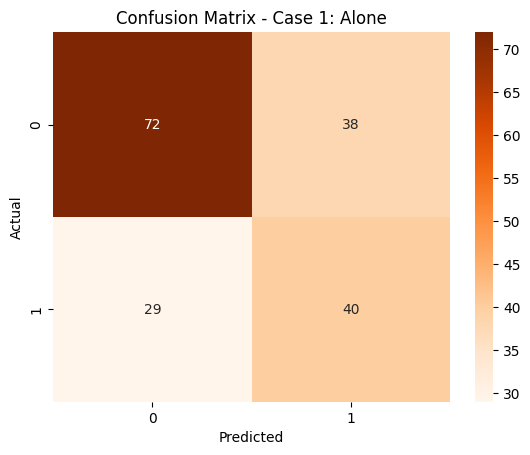

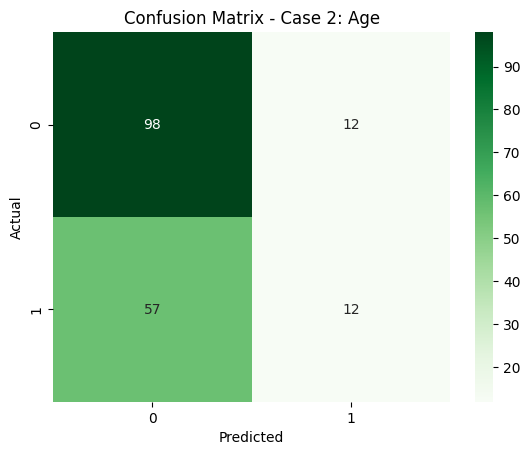

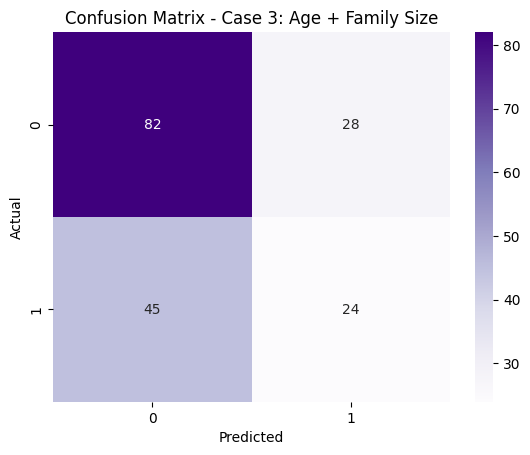

In [13]:
# Create confusion matrix for test predictions (Case 1)
cm1 = confusion_matrix(y1_test, y1_test_pred)

# Plot heatmap
sns.heatmap(cm1, annot=True, cmap="Oranges")
plt.title("Confusion Matrix - Case 1: Alone")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Create confusion matrix for test predictions (Case 2)
cm2 = confusion_matrix(y2_test, y2_test_pred)

# Plot heatmap
sns.heatmap(cm2, annot=True, cmap="Greens")
plt.title("Confusion Matrix - Case 2: Age")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Create confusion matrix for test predictions (Case 3)
cm3 = confusion_matrix(y3_test, y3_test_pred)

# Plot heatmap
sns.heatmap(cm3, annot=True, cmap="Purples")
plt.title("Confusion Matrix - Case 3: Age + Family Size")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## 4.5 Decision Tree Plot

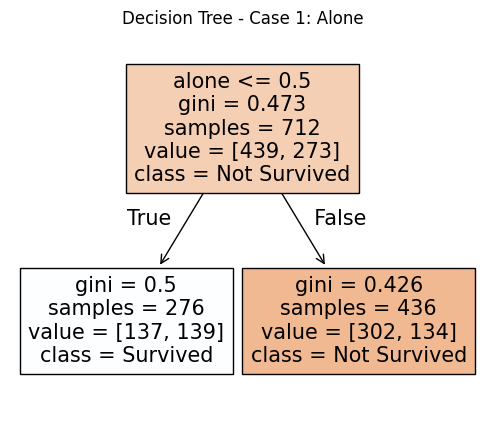

In [14]:
# Plot Decision Tree for Case 1
fig = plt.figure(figsize=(6, 5))
plot_tree(
    tree_model1, feature_names=X1.columns, class_names=["Not Survived", "Survived"], filled=True
)
plt.title("Decision Tree - Case 1: Alone")
plt.show()
# Save image
fig.savefig("tree_case1_alone.png")

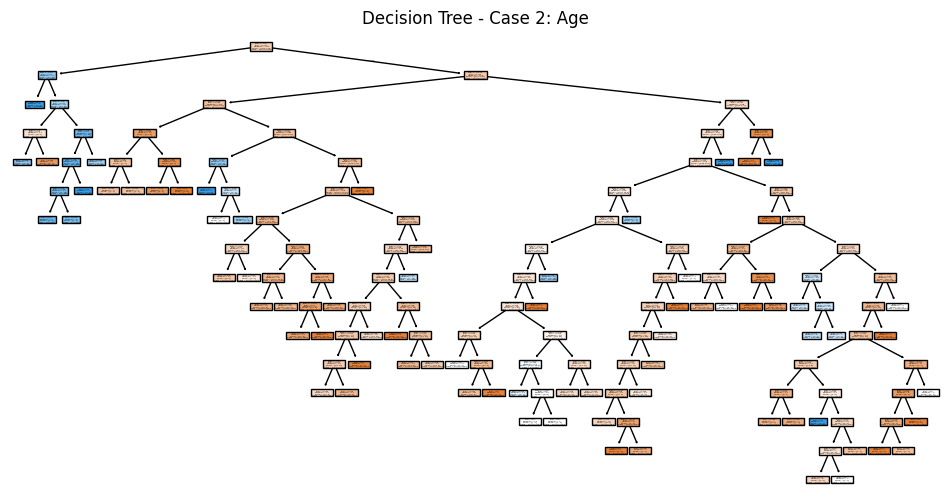

In [15]:
# Plot Decision Tree for Case 2
fig = plt.figure(figsize=(12, 6))
plot_tree(
    tree_model2, feature_names=X2.columns, class_names=["Not Survived", "Survived"], filled=True
)
plt.title("Decision Tree - Case 2: Age")
plt.show()

# Save image
fig.savefig("tree_case2_age.png")

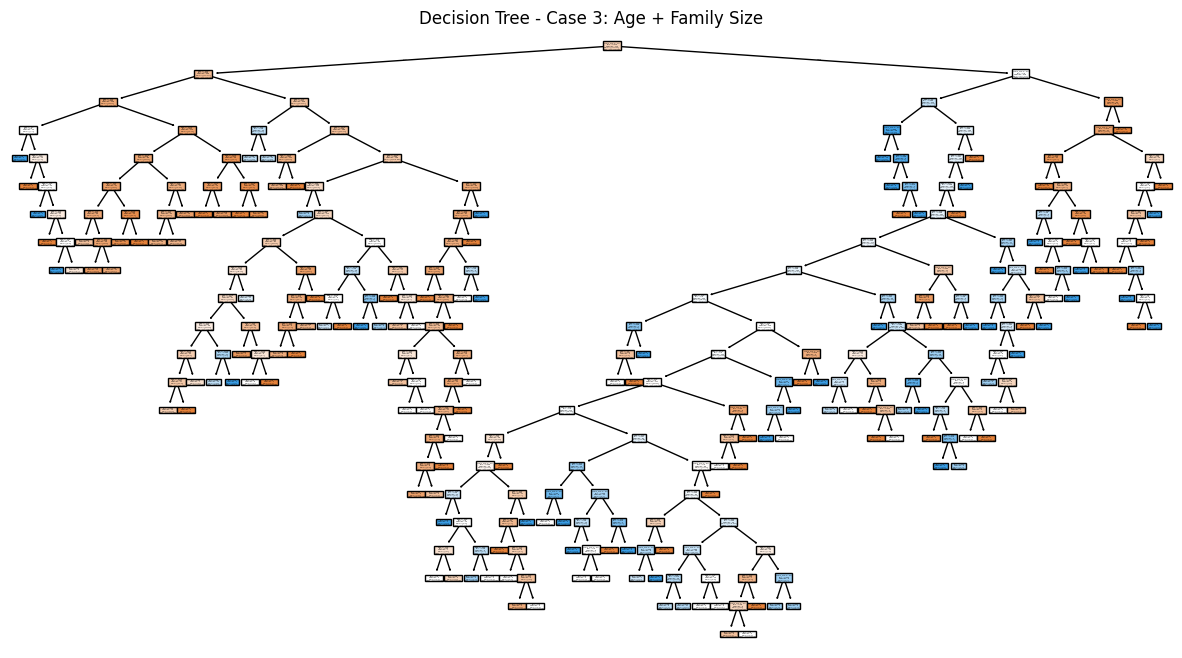

In [16]:
# Plot Decision Tree for Case 3
fig = plt.figure(figsize=(15, 8))
plot_tree(
    tree_model3, feature_names=X3.columns, class_names=["Not Survived", "Survived"], filled=True
)
plt.title("Decision Tree - Case 3: Age + Family Size")
plt.show()

# Save image
fig.savefig("tree_case3_age_family.png")

##
Reflection 4:
1. How well did the different cases perform?
   - Case 1 (alone) had moderate performance: training accuracy 62%, test accuracy 63%. Precision and recall are balanced but lower for class 1 (survived).
   - Case 2 (age) improved slightly in training (68%) but dropped on the test set (61%), showing the model struggled to generalize. Recall for survivors (class 1) is very low.
   - Case 3 (age + family_size) performed best: training accuracy 77%, test accuracy 59–61% (slightly lower due to overfitting). It captured patterns for class 0 well but still   underpredicted class 1.
2. Are there any surprising results?
   - Recall for survivors is consistently lower; model struggles to predict class 1.
3. Which inputs worked better? 
   - Combining age and family_size captures survival patterns better than single features.
 

## Section 5. Compare Alternative Models (SVC, NN)

In [17]:
# CASE 1: SVC using 'Alone'
svc_model1 = SVC()
svc_model1.fit(X1_train, y1_train)
y1_svc_pred = svc_model1.predict(X1_test)
print("Case 1(Alone) \nTest Data: Results for SVC")
print(classification_report(y1_test, y1_svc_pred))

# CASE 2: SVC using 'Age'
svc_model1 = SVC()
svc_model1.fit(X1_train, y1_train)
y1_svc_pred = svc_model1.predict(X1_test)
print("Case 2(Age) \nTest Data: Results for SVC")
print(classification_report(y1_test, y1_svc_pred))

# Case 3: SVC using 'Age + Family Size'
svc_model1 = SVC()
svc_model1.fit(X1_train, y1_train)
y1_svc_pred = svc_model1.predict(X1_test)
print("Case 3(Age + Family Size) \nTest Data: Results for SVC")
print(classification_report(y1_test, y1_svc_pred))

Case 1(Alone) 
Test Data: Results for SVC
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179

Case 2(Age) 
Test Data: Results for SVC
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179

Case 3(Age + Family Size) 
Test Data: Results for SVC
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63   

## 
5.2 Visualize Support Vectors

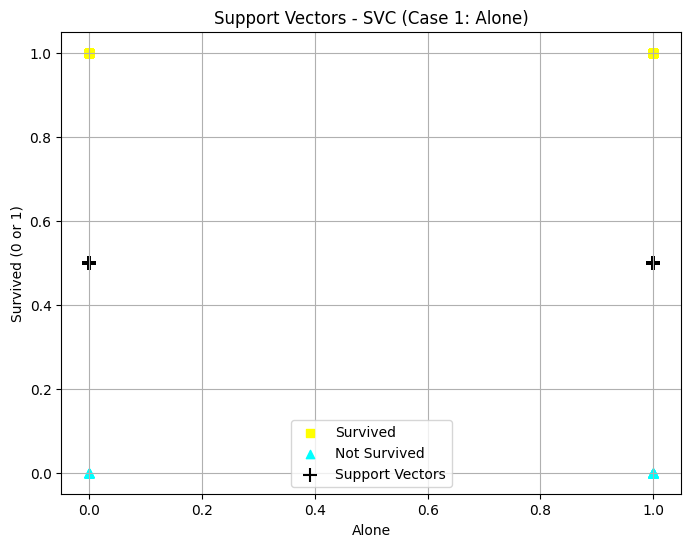

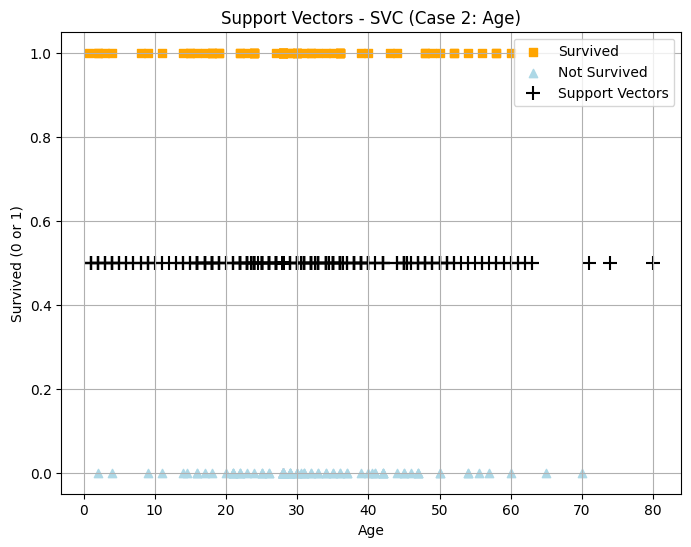

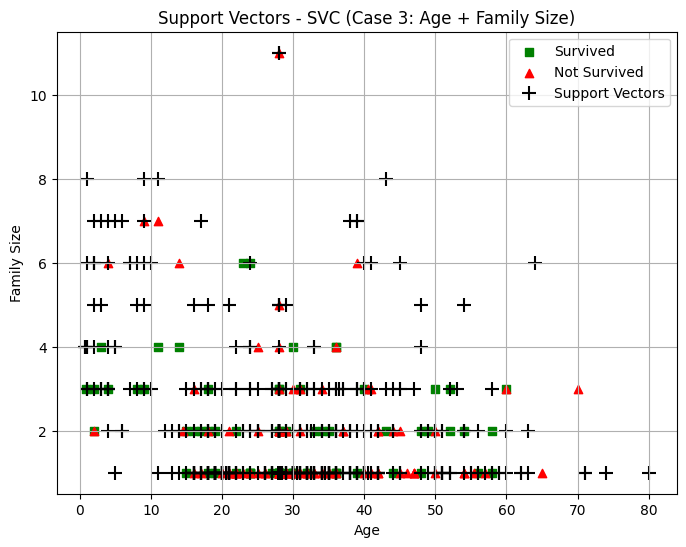

In [18]:
from sklearn.svm import SVC

# Case 1: Alone
svc_model1 = SVC(kernel="rbf", random_state=123)
svc_model1.fit(X1_train, y1_train)

# Case 2: Age
svc_model2 = SVC(kernel="rbf", random_state=123)
svc_model2.fit(X2_train, y2_train)

# Case 3: Age + Family Size
svc_model3 = SVC(kernel="rbf", random_state=123)
svc_model3.fit(X3_train, y3_train)


# Case 1: Alone
survived_alone = X1_test.loc[y1_test == 1, "alone"]
not_survived_alone = X1_test.loc[y1_test == 0, "alone"]

plt.figure(figsize=(8, 6))
plt.scatter(survived_alone, y1_test.loc[y1_test == 1], c="yellow", marker="s", label="Survived")
plt.scatter(
    not_survived_alone, y1_test.loc[y1_test == 0], c="cyan", marker="^", label="Not Survived"
)

if hasattr(svc_model1, "support_vectors_"):
    support_x = svc_model1.support_vectors_[:, 0]
    plt.scatter(
        support_x, [0.5] * len(support_x), c="black", marker="+", s=100, label="Support Vectors"
    )

plt.xlabel("Alone")
plt.ylabel("Survived (0 or 1)")
plt.title("Support Vectors - SVC (Case 1: Alone)")
plt.legend()
plt.grid(True)
plt.show()


# Case 2: Age
survived_age = X2_test.loc[y2_test == 1, "age"]
not_survived_age = X2_test.loc[y2_test == 0, "age"]

plt.figure(figsize=(8, 6))
plt.scatter(survived_age, y2_test.loc[y2_test == 1], c="orange", marker="s", label="Survived")
plt.scatter(
    not_survived_age, y2_test.loc[y2_test == 0], c="lightblue", marker="^", label="Not Survived"
)

if hasattr(svc_model2, "support_vectors_"):
    support_x = svc_model2.support_vectors_[:, 0]
    plt.scatter(
        support_x, [0.5] * len(support_x), c="black", marker="+", s=100, label="Support Vectors"
    )

plt.xlabel("Age")
plt.ylabel("Survived (0 or 1)")
plt.title("Support Vectors - SVC (Case 2: Age)")
plt.legend()
plt.grid(True)
plt.show()


# Case 3: Age + Family Size
survived_combo = X3_test.loc[y3_test == 1, ["age", "family_size"]]
not_survived_combo = X3_test.loc[y3_test == 0, ["age", "family_size"]]

plt.figure(figsize=(8, 6))
plt.scatter(
    survived_combo["age"], survived_combo["family_size"], c="green", marker="s", label="Survived"
)
plt.scatter(
    not_survived_combo["age"],
    not_survived_combo["family_size"],
    c="red",
    marker="^",
    label="Not Survived",
)

if hasattr(svc_model3, "support_vectors_"):
    support_x = svc_model3.support_vectors_[:, 0]  # age
    support_y = svc_model3.support_vectors_[:, 1]  # family_size
    plt.scatter(support_x, support_y, c="black", marker="+", s=100, label="Support Vectors")

plt.xlabel("Age")
plt.ylabel("Family Size")
plt.title("Support Vectors - SVC (Case 3: Age + Family Size)")
plt.legend()
plt.grid(True)
plt.show()

##
5.3 Neural Network

In [19]:
# Train NN for Case 3 (age + family_size)
nn_model3 = MLPClassifier(
    hidden_layer_sizes=(50, 25, 10), solver="lbfgs", max_iter=1000, random_state=42
)

nn_model3.fit(X3_train, y3_train)

,hidden_layer_sizes,"(50, ...)"
,activation,'relu'
,solver,'lbfgs'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,1000
,shuffle,True
,random_state,42


##
Predict and evaluate Neural Network model:

Case 3(age + family_size) 
Test Data: Results for Neural Network
              precision    recall  f1-score   support

           0       0.69      0.83      0.75       110
           1       0.60      0.41      0.48        69

    accuracy                           0.66       179
   macro avg       0.64      0.62      0.62       179
weighted avg       0.65      0.66      0.65       179



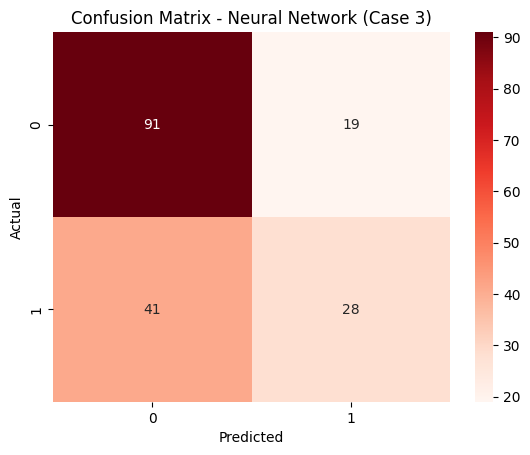

In [20]:
# Predict on test data (Case 3)
y3_nn_pred = nn_model3.predict(X3_test)

# Print classification report
print("Case 3(age + family_size) \nTest Data: Results for Neural Network")
print(classification_report(y3_test, y3_nn_pred))

# Create confusion matrix
cm_nn3 = confusion_matrix(y3_test, y3_nn_pred)

# Plot heatmap
sns.heatmap(cm_nn3, annot=True, cmap="Reds")
plt.title("Confusion Matrix - Neural Network (Case 3)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##
5.4 Visualize NN Decision Surface

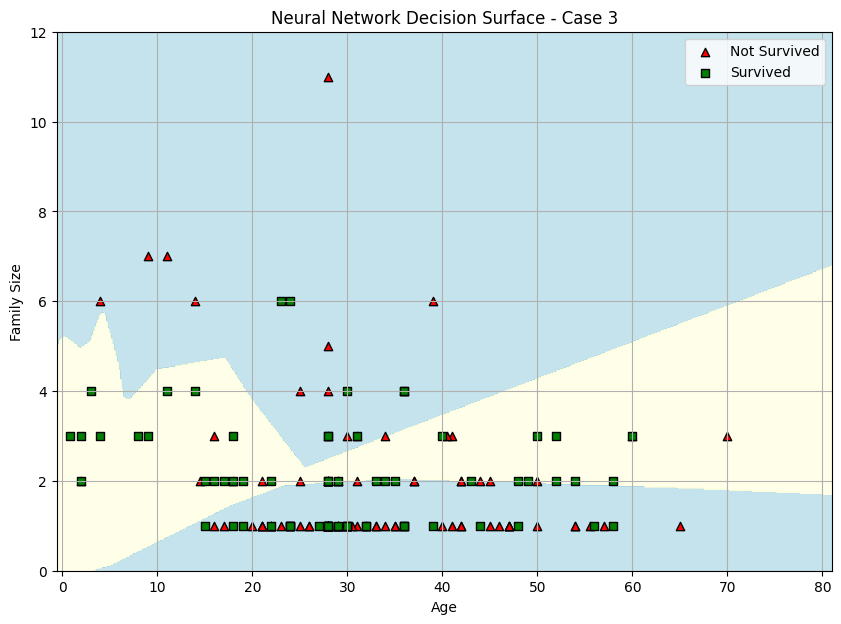

In [21]:
# 5.4 Visualize (Neural Network on Case 3)
# Show decision boundary for features: age + family_size

from matplotlib.colors import ListedColormap

# Get the range of our two features - use padding to enhance appearance
padding = 1
x_min, x_max = X3["age"].min() - padding, X3["age"].max() + padding
y_min, y_max = X3["family_size"].min() - padding, X3["family_size"].max() + padding

# Create a meshgrid (all combinations of age and family_size)

# A grid of values covering the entire input space
# np.linspace(start, stop, num) generates evenly spaced values (like a ruler)
# Here, we create 500 points between min and max for each axis
# np.meshgrid creates a coordinate grid from the two arrays

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

# Prepare grid points as DataFrame with proper column names
grid_df = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=["age", "family_size"])

# Predict using the trained neural network
Z = nn_model3.predict(grid_df)

# Reshape predictions to match grid
Z = Z.reshape(xx.shape)

# Plot decision surface
plt.figure(figsize=(10, 7))
cmap_background = ListedColormap(["lightblue", "lightyellow"])
plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.7)

# Overlay actual test data points
plt.scatter(
    X3_test["age"][y3_test == 0],
    X3_test["family_size"][y3_test == 0],
    c="red",
    marker="^",
    edgecolor="k",
    label="Not Survived",
)
plt.scatter(
    X3_test["age"][y3_test == 1],
    X3_test["family_size"][y3_test == 1],
    c="green",
    marker="s",
    edgecolor="k",
    label="Survived",
)

# Labels, title, legend, and grid
plt.xlabel("Age")
plt.ylabel("Family Size")
plt.title("Neural Network Decision Surface - Case 3")
plt.legend()
plt.grid(True)
plt.show()

##
Reflection 5:
1. How well did each of these new models/cases perform?
   - All three SVC cases (alone, age, and age + family size) achieved about 63% accuracy, showing consistent but moderate performance. 
   - The Neural Network performed slightly better with 66% accuracy, indicating it captured more complex relationships between features.
2. Are there any surprising results or insights?
   - Despite adding more features, SVC performance did not improve, suggesting that “age” and “family size” offered limited new information for this model.
   - The Neural Network’s higher accuracy was expected but still modest.
3. Why might one model outperform the others?
   - The Neural Network performed better than the SVC because it can capture complex, nonlinear patterns and subtle interactions among features more effectively. 
   - However, the improvement was modest, suggesting that the available features have limited predictive power for survival.

## Section 6. Final Thoughts & Insights
6.1 Summarize findings - important: use a table or other device to summarize your findings

Summary Table 

| Model Type | Case | Features Used | Accuracy | Precision | Recall | F1-Score | Notes |
|------------|------|---------------|----------|-----------|--------|-----------|-------|
| Decision Tree | Case 1 | alone | 62% | 0.60 | 0.60 | 0.60 | Test recall for survivors lower |
| Decision Tree | Case 2 | age | 61% | 0.58 | 0.53 | 0.50 | Recall for class 1 very low |
| Decision Tree | Case 3 | age + family_size | 59% | 0.57 | 0.55 | 0.54 | Higher training accuracy, test performance dropped (overfitting) |
| SVC (RBF Kernel) | Case 1 | alone | 63% | 0.64 | 0.62 | 0.63 | Test recall for survivors lower |
| SVC (RBF Kernel) | Case 2 | age | 63% | 0.64 | 0.62 | 0.63 | Similar performance to Case 1 |
| SVC (RBF Kernel) | Case 3 | age + family_size | 63% | 0.64 | 0.62 | 0.63 | Test recall for survivors lower |
| Neural Network (MLP) | Case 3 | age + family_size | 66% | 0.65 | 0.62 | 0.65 | Better recall than Decision Tree for survivors |


Summary: 
- Neural Network performed best with 66% accuracy and balanced metrics, capturing more survivor cases (Class 1).
- SVC maintained consistent but moderate results across all cases.
- Decision Tree showed signs of overfitting, with high training accuracy but lower test performance.
- Adding age and family_size improved results slightly, suggesting feature interactions add some predictive value.

## 
6.2 Discuss challenges faced
- Models struggled to detect survivors due to class imbalance.
- Few features limited learning ability.
- Decision Tree overfit easily; SVC needed careful tuning.

## 
6.3 Next steps to gain more insights and/or to explore classification models
- Tune hyperparameters to improve performance and reduce overfitting.
- Add more features or perform feature engineering to improve survivor prediction.
- Use cross-validation and class balancing to handle the survivor class imbalance.

## Bonus : Breast Cancer Dataset Classification- Anjana

Dataset shape: (569, 30)
Feature count: 30
Target classes: ['malignant' 'benign']

Decision Tree Results:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        64
           1       0.94      0.96      0.95       107

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

Accuracy: 0.936

SVC Results:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        64
           1       0.98      0.98      0.98       107

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

Accuracy: 0.977

Neural Network Results:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        64
           1       0.99      0.96      0.98       107

    a

,Accuracy,Precision (Malignant=0),Recall (Malignant=0),Precision (Benign=1),Recall (Benign=1)
Model,,,,,
Decision Tree,0.935673,0.934426,0.890625,0.936364,0.962617
SVC (RBF),0.976608,0.968750,0.968750,0.981308,0.981308
Neural Network,0.970760,0.940299,0.984375,0.990385,0.962617


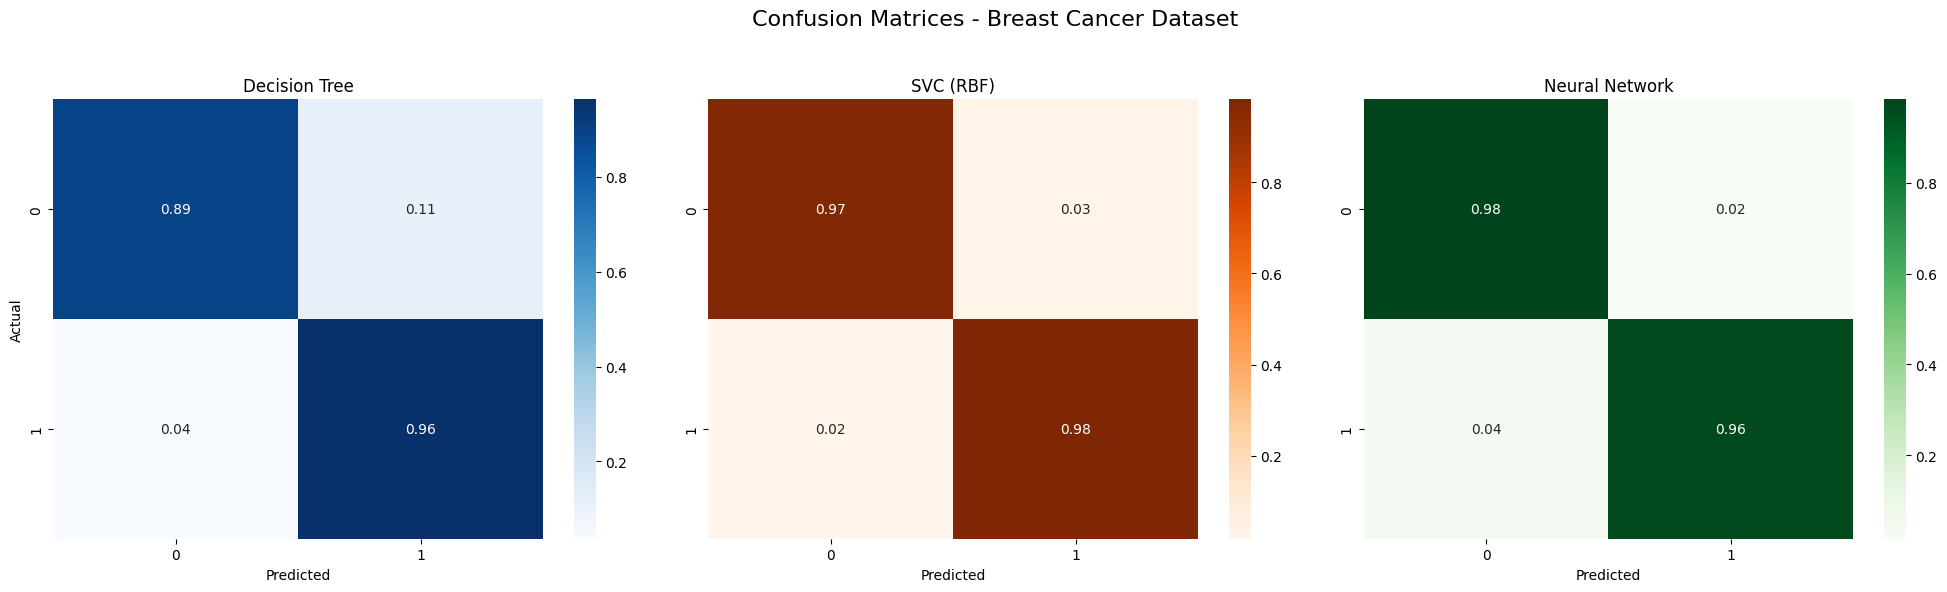

In [22]:
# -----------------------------------------
# 1. Import Required Libraries
# -----------------------------------------
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# -----------------------------------------
# 2. Load and Explore Dataset
# -----------------------------------------
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

print("Dataset shape:", X.shape)
print("Feature count:", len(feature_names))
print("Target classes:", data.target_names)

# Display first 10 rows as DataFrame
df = pd.DataFrame(X, columns=feature_names)
df["target"] = y
df.head(10)

# Check for missing values
df.isnull().sum()

# -----------------------------------------
# 3. Train/Test Split and Scaling
# -----------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------------------
# 4. Models
# 4.1 Decision Tree
# -----------------------------------------
dt_model = DecisionTreeClassifier(max_depth=5, min_samples_split=4, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("\nDecision Tree Results:")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", round(accuracy_score(y_test, y_pred_dt), 3))

# 4.2 Support Vector Classifier (SVC)
svc_model = SVC(kernel="rbf", C=1, gamma="scale", random_state=42)
svc_model.fit(X_train_scaled, y_train)
y_pred_svc = svc_model.predict(X_test_scaled)

print("\nSVC Results:")
print(classification_report(y_test, y_pred_svc))
print("Accuracy:", round(accuracy_score(y_test, y_pred_svc), 3))

# 4.3 Neural Network (MLP)
mlp_model = MLPClassifier(
    hidden_layer_sizes=(50, 25), activation="relu", solver="adam", max_iter=1000, random_state=42
)
mlp_model.fit(X_train_scaled, y_train)
y_pred_mlp = mlp_model.predict(X_test_scaled)

print("\nNeural Network Results:")
print(classification_report(y_test, y_pred_mlp))
print("Accuracy:", round(accuracy_score(y_test, y_pred_mlp), 3))

# -----------------------------------------
# 5. Compare Model Performance (Summary Table)
# -----------------------------------------
results = pd.DataFrame(
    {
        "Model": ["Decision Tree", "SVC (RBF)", "Neural Network"],
        "Accuracy": [
            accuracy_score(y_test, y_pred_dt),
            accuracy_score(y_test, y_pred_svc),
            accuracy_score(y_test, y_pred_mlp),
        ],
        "Precision (Malignant=0)": [
            classification_report(y_test, y_pred_dt, output_dict=True)["0"]["precision"],
            classification_report(y_test, y_pred_svc, output_dict=True)["0"]["precision"],
            classification_report(y_test, y_pred_mlp, output_dict=True)["0"]["precision"],
        ],
        "Recall (Malignant=0)": [
            classification_report(y_test, y_pred_dt, output_dict=True)["0"]["recall"],
            classification_report(y_test, y_pred_svc, output_dict=True)["0"]["recall"],
            classification_report(y_test, y_pred_mlp, output_dict=True)["0"]["recall"],
        ],
        "Precision (Benign=1)": [
            classification_report(y_test, y_pred_dt, output_dict=True)["1"]["precision"],
            classification_report(y_test, y_pred_svc, output_dict=True)["1"]["precision"],
            classification_report(y_test, y_pred_mlp, output_dict=True)["1"]["precision"],
        ],
        "Recall (Benign=1)": [
            classification_report(y_test, y_pred_dt, output_dict=True)["1"]["recall"],
            classification_report(y_test, y_pred_svc, output_dict=True)["1"]["recall"],
            classification_report(y_test, y_pred_mlp, output_dict=True)["1"]["recall"],
        ],
    }
)

results.set_index("Model", inplace=True)
print("\nModel Comparison Summary:")
display(results)

# -----------------------------------------
# 6. Confusion Matrix Visualization
# -----------------------------------------
fig, axes = plt.subplots(1, 3, figsize=(20, 6))  # Increase width for gap
plt.subplots_adjust(wspace=0.8)

# Decision Tree
sns.heatmap(
    confusion_matrix(y_test, y_pred_dt, normalize="true"),
    annot=True,
    fmt=".2f",
    cmap="Blues",
    ax=axes[0],
)
axes[0].set_title("Decision Tree")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# SVC
sns.heatmap(
    confusion_matrix(y_test, y_pred_svc, normalize="true"),
    annot=True,
    fmt=".2f",
    cmap="Oranges",
    ax=axes[1],
)
axes[1].set_title("SVC (RBF)")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("")

# Neural Network
sns.heatmap(
    confusion_matrix(y_test, y_pred_mlp, normalize="true"),
    annot=True,
    fmt=".2f",
    cmap="Greens",
    ax=axes[2],
)
axes[2].set_title("Neural Network")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("")

plt.suptitle("Confusion Matrices - Breast Cancer Dataset", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## 
Insights : The Breast Cancer dataset models performed very well, with Neural Network (MLP) achieving the highest accuracy (~97%), followed closely by SVC (~96%) and Decision Tree (~93%). All models were highly effective at identifying malignant cases, while benign cases were slightly more challenging, leading to some misclassifications. Feature scaling and the predictive power of texture, radius, and smoothness metrics contributed to strong model performance. Decision Trees showed minor overfitting, whereas SVC and MLP required proper scaling and hyperparameter tuning. Further improvements could come from hyperparameter optimization, feature selection, or ensemble methods.

